In [1]:
import tensorflow as tf
import os
import numpy as np
import PIL

from PIL import Image
from glob import glob

In [3]:
root = './dacon1/train/'

training_images = []
training_labels = []

for filename in glob(root +"*"):
    for img in glob(filename + "/*.jpg"):
        an_img = PIL.Image.open(img)
        img_array = np.array(an_img)
        training_images.append(img_array)
        label = filename.split('\\')[-1]
        training_labels.append(label)
        
training_images = np.array(training_images)
training_labels = np.array(training_labels)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_labels= le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1,1)

print(training_images.shape)
print(training_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [7]:
root2 = './dacon1/test/'

test_images = []
test_idx = []

flist = sorted(glob(root2 + '*.jpg'))

for filename in flist:
    an_img = PIL.Image.open(filename)
    img_array = np.array(an_img)
    test_images.append(img_array)
    label = filename.split('\\')[-1]
    test_idx.append(label)
    
test_images = np.array(test_images)

print(test_images.shape)
print(test_idx[0:3])

(10000, 32, 32, 3)
['0000.jpg', '0001.jpg', '0002.jpg']


[0],[0],[0],[0],[0],

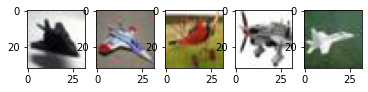

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(training_images[i])
    print(training_labels[i], end=",")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(training_images, training_labels, test_size=0.3, random_state=42)

X_test = test_images

In [22]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = 'relu'), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [24]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
#steps_per_epoch과 validation_steps크기를 알아보기 위한 수식

steps_per_epoch = len(X_train)// 64
validation_steps = len(X_test)// 64 # --> 64는 배치 사이즈 갯수이다.

print(steps_per_epoch, steps_per_epoch)

546 546


In [28]:
model.fit(X_train, y_train, validation_data = (X_valid, y_valid), steps_per_epoch = 546, epochs=25, validation_steps=546,
          batch_size = 64, verbose = 2)

Epoch 1/25
546/546 - 32s - loss: 1.5682 - accuracy: 0.4248 - val_loss: 1.4478 - val_accuracy: 0.4606 - 32s/epoch - 59ms/step
Epoch 2/25
546/546 - 30s - loss: 1.4575 - accuracy: 0.4651 - val_loss: 1.3503 - val_accuracy: 0.5145 - 30s/epoch - 56ms/step
Epoch 3/25
546/546 - 31s - loss: 1.3849 - accuracy: 0.4941 - val_loss: 1.2574 - val_accuracy: 0.5443 - 31s/epoch - 56ms/step
Epoch 4/25
546/546 - 31s - loss: 1.3266 - accuracy: 0.5172 - val_loss: 1.2079 - val_accuracy: 0.5637 - 31s/epoch - 56ms/step
Epoch 5/25
546/546 - 30s - loss: 1.2886 - accuracy: 0.5324 - val_loss: 1.1847 - val_accuracy: 0.5731 - 30s/epoch - 55ms/step
Epoch 6/25
546/546 - 29s - loss: 1.2493 - accuracy: 0.5500 - val_loss: 1.1380 - val_accuracy: 0.5941 - 29s/epoch - 53ms/step
Epoch 7/25
546/546 - 31s - loss: 1.2144 - accuracy: 0.5627 - val_loss: 1.1065 - val_accuracy: 0.6005 - 31s/epoch - 57ms/step
Epoch 8/25
546/546 - 31s - loss: 1.1840 - accuracy: 0.5734 - val_loss: 1.0555 - val_accuracy: 0.6217 - 31s/epoch - 58ms/step


In [29]:
pred_proba = model.predict(X_test) 

pred_class = []

for i in pred_proba:
    pred = np.argmax(i)
    pred_class.append(pred)
    
pred_class = le.inverse_transform(pred_class)
pred_class[0:5]

array(['horse', 'bird', 'airplane', 'dog', 'airplane'], dtype='<U10')

In [31]:
import pandas as pd

sample_submission = pd.read_csv("./dacon1/sample_submission.csv")

sample_submission.target = pred_class
sample_submission.to_csv("submit.csv",index=False)

In [32]:
sample_submission.head()

,id,target
0,0000.jpg,horse
1,0001.jpg,bird
2,0002.jpg,airplane
3,0003.jpg,dog
4,0004.jpg,airplane
